# Lembrete

- Não teremos aula na quarta e sexta da semana que vem
- Novo prazo do projeto: 10/outubro/2022

# Hoje!

Primeira metade será hands-on, vocês escolhem:
- Exercício da aula passada
- ~Projeto~

**Para vocês**: Utilizando o dataset do titanic, realizar o seguinte processo:

1. Separar em dois dataframes de treino e teste.
1. Rodar um modelo simples de **SVM**, sem uso de pipeline, usando como resposta Survived e Pclass e Age como explicativa, substituindo missing pela mediana com uso de SimplesImputer;
2. Criar pipeline para rodar o modelo, adicionando apenas o SimpleImputer e o SVC - aqui, na hora do fit, passamos apenas as mesmas três colunas do step 2;
3. Usar o ColumnTransformer para criar a pipeline - manteremos o modelo usando apenas as mesmas duas colunas do step 1, com a diferença agora que o fit recebe todas as colunas e o **ColumnTransformer fará a seleção**;
4. Criar uma pipeline para dados numéricos (SimplesImputer com mediana, nas colunas Pclass, Age, SibSp e Parch) e uma outra pipeline para dados string (OrdinalEncoder, na coluna Sex, e SimpleImputer com a moda);
6. Adicionar uma **camada final para todas as variáveis** para fazer um redimensionamento com StandardScaler.
7. Refletir: podemos usar a coluna Name como variável explicativa para fazer previsão? É possível fazer algum pré-processamento nela?

## Na aula anterior...

Qual a principal diferença entre os modelos supervisionados e os modelos não supervisionados?

Qual etapa vem após encontrar os grupos/clusters em modelos não supervisionados?

Quais aplicações podemos ter de modelos não supervisionados?

## Correção de pontos passados

- Ponto sobre `probability` do SVM

## Algoritmos de Clusterização

### K-Means

1. Escolha aleatória de K exemplos do conjunto de dados que serão os centróides iniciais;
2. Por meio de uma métrica de proximidade, assimila cada instância do conjunto de dados a um centróide;
3. Cria novos K centróides baseado na média de todos os exemplos associados a um centróide específico.
4. Continua o processo 2 e 3 até que não exista nenhuma modificação de centróide.

<img src="imagens/cluster_kmean.png"/>

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans

In [75]:
n_centros = 5

x, y = make_blobs(
    n_samples = 500, 
    n_features = 2, 
    centers = n_centros,
    random_state = 1
)

In [76]:
var_expl = ['F1', 'F2']
var_resp = 'Y'

In [77]:
df = pd.DataFrame(x, columns = var_expl)
df[var_resp] = y

df.head()

,F1,F2,Y
0,-2.330222,4.784054,0
1,-2.279304,1.797583,4
2,-7.225705,-3.793136,3
3,-7.666039,-7.597155,2
4,-7.831737,-3.701228,3


In [78]:
df.Y.value_counts()

0    100
4    100
3    100
2    100
1    100
Name: Y, dtype: int64

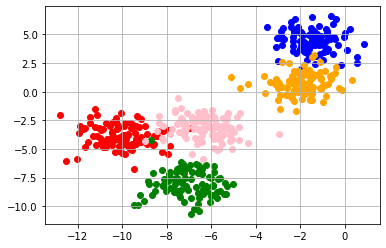

In [82]:
plt.scatter(df[df.Y == 0]['F1'], df[df.Y == 0]['F2'], color = 'blue')
plt.scatter(df[df.Y == 1]['F1'], df[df.Y == 1]['F2'], color = 'red')
plt.scatter(df[df.Y == 2]['F1'], df[df.Y == 2]['F2'], color = 'green')
plt.scatter(df[df.Y == 3]['F1'], df[df.Y == 3]['F2'], color = 'pink')
plt.scatter(df[df.Y == 4]['F1'], df[df.Y == 4]['F2'], color = 'orange')

plt.grid()

plt.show()

### Com 5 clusters

In [83]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(df[var_expl])
df['CLUSTER_5'] = kmeans.predict(df[var_expl])

In [84]:
df.head()

,F1,F2,Y,CLUSTER_5
0,-2.330222,4.784054,0,1
1,-2.279304,1.797583,4,4
2,-7.225705,-3.793136,3,0
3,-7.666039,-7.597155,2,2
4,-7.831737,-3.701228,3,0


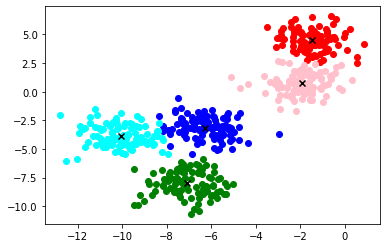

In [86]:
plt.scatter(df[df.CLUSTER_5 == 0]['F1'], df[df.CLUSTER_5 == 0]['F2'], color = 'blue')
plt.scatter(df[df.CLUSTER_5 == 1]['F1'], df[df.CLUSTER_5 == 1]['F2'], color = 'red')
plt.scatter(df[df.CLUSTER_5 == 2]['F1'], df[df.CLUSTER_5 == 2]['F2'], color = 'green')
plt.scatter(df[df.CLUSTER_5 == 3]['F1'], df[df.CLUSTER_5 == 3]['F2'], color = 'cyan')
plt.scatter(df[df.CLUSTER_5 == 4]['F1'], df[df.CLUSTER_5 == 4]['F2'], color = 'pink')

## mostrando os centróides
plt.scatter(
    kmeans.cluster_centers_[:, 0], 
    kmeans.cluster_centers_[:, 1],
    marker = "x",
    color = "black"
)

plt.show()

### Com 2 clusters

In [87]:
n_clusters = 2

kmeans = KMeans(n_clusters = n_clusters)
kmeans.fit(df[var_expl])
df['CLUSTER_2'] = kmeans.predict(df[var_expl])

In [88]:
df.head()

,F1,F2,Y,CLUSTER_5,CLUSTER_2
0,-2.330222,4.784054,0,1,1
1,-2.279304,1.797583,4,4,1
2,-7.225705,-3.793136,3,0,0
3,-7.666039,-7.597155,2,2,0
4,-7.831737,-3.701228,3,0,0


<function matplotlib.pyplot.show(close=None, block=None)>

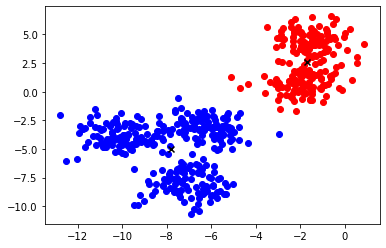

In [89]:
## mostrando os pontos da base
plt.scatter(df[df.CLUSTER_2 == 0]['F1'], df[df.CLUSTER_2 == 0]['F2'], color = 'blue')
plt.scatter(df[df.CLUSTER_2 == 1]['F1'], df[df.CLUSTER_2 == 1]['F2'], color = 'red')

## mostrando os centróides
plt.scatter(
    kmeans.cluster_centers_[:, 0], 
    kmeans.cluster_centers_[:, 1],
    marker = "x",
    color = "black"
)


plt.show

### Com 3 clusters

In [90]:
n_clusters = 3

kmeans = KMeans(n_clusters = n_clusters)
kmeans.fit(df[var_expl])
df['CLUSTER_3'] = kmeans.predict(df[var_expl])

In [91]:
df.head()

,F1,F2,Y,CLUSTER_5,CLUSTER_2,CLUSTER_3
0,-2.330222,4.784054,0,1,1,1
1,-2.279304,1.797583,4,4,1,1
2,-7.225705,-3.793136,3,0,0,2
3,-7.666039,-7.597155,2,2,0,0
4,-7.831737,-3.701228,3,0,0,2


<function matplotlib.pyplot.show(close=None, block=None)>

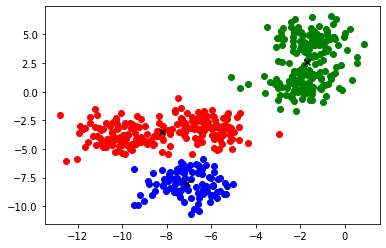

In [92]:
## mostrando os pontos da base
plt.scatter(df[df.CLUSTER_3 == 0]['F1'], df[df.CLUSTER_3 == 0]['F2'], color = 'blue')
plt.scatter(df[df.CLUSTER_3 == 1]['F1'], df[df.CLUSTER_3 == 1]['F2'], color = 'green')
plt.scatter(df[df.CLUSTER_3 == 2]['F1'], df[df.CLUSTER_3 == 2]['F2'], color = 'red')

## mostrando os centróides
plt.scatter(
    kmeans.cluster_centers_[:, 0], 
    kmeans.cluster_centers_[:, 1],
    marker = "x",
    color = "black"
)


plt.show

In [93]:
kmeans.inertia_

2348.684545728664

### Com 500 clusters

In [94]:
df.shape

(500, 6)

In [95]:
n_clusters = 500

kmeans = KMeans(n_clusters = n_clusters)
kmeans.fit(df[var_expl])
df['CLUSTER_500'] = kmeans.predict(df[var_expl])

In [96]:
df.head()

,F1,F2,Y,CLUSTER_5,CLUSTER_2,CLUSTER_3,CLUSTER_500
0,-2.330222,4.784054,0,1,1,1,3
1,-2.279304,1.797583,4,4,1,1,127
2,-7.225705,-3.793136,3,0,0,2,226
3,-7.666039,-7.597155,2,2,0,0,379
4,-7.831737,-3.701228,3,0,0,2,262


<function matplotlib.pyplot.show(close=None, block=None)>

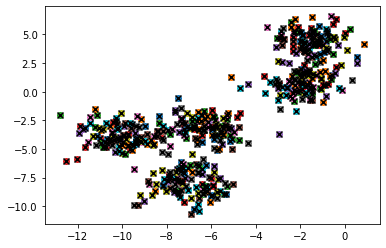

In [97]:
## mostrando os pontos da base
for i in range(500):
    plt.scatter(df[df.CLUSTER_500 == i]['F1'], df[df.CLUSTER_500 == i]['F2'])

## mostrando os centróides
plt.scatter(
    kmeans.cluster_centers_[:, 0], 
    kmeans.cluster_centers_[:, 1],
    marker = "x",
    color = "black"
)


plt.show

In [98]:
kmeans.inertia_

0.0

### Cálculo da inércia

In [99]:
lista_diferenca_intracluster = []

for i in range(2, 16):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df[var_expl])
    
    lista_diferenca_intracluster.append(kmeans.inertia_)
    

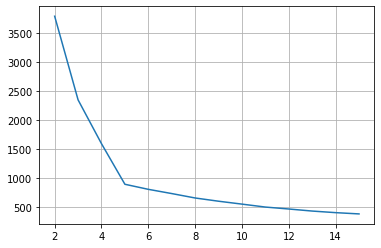

In [100]:
plt.plot(range(2, 16), lista_diferenca_intracluster)
plt.grid()
plt.show()

### Para outro dataset

In [110]:
x, y = make_moons(n_samples = 1000, noise = 0.1, random_state = 123)

In [111]:
var_expl = ['F1', 'F2']
var_resp = 'Y'

df = pd.DataFrame(x, columns = var_expl)
df[var_resp] = y

df.head()

,F1,F2,Y
0,0.666374,0.823195,0
1,0.281627,0.947888,0
2,0.938688,0.133326,0
3,0.255610,-0.078239,1
4,0.754683,0.756513,0


In [112]:
df.Y.value_counts()

0    500
1    500
Name: Y, dtype: int64

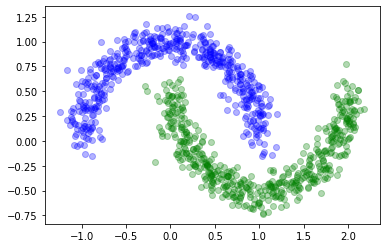

In [115]:
plt.scatter(df[df.Y == 0]['F1'], df[df.Y == 0]['F2'], color = 'blue', alpha = 0.3)
plt.scatter(df[df.Y == 1]['F1'], df[df.Y == 1]['F2'], color = 'green', alpha = 0.3)

plt.show()

In [116]:
n_clusters = 2

kmeans = KMeans(n_clusters = n_clusters)
kmeans.fit(df[var_expl])
df['CLUSTER_2'] = kmeans.predict(df[var_expl])

In [117]:
df.head()

,F1,F2,Y,CLUSTER_2
0,0.666374,0.823195,0,1
1,0.281627,0.947888,0,1
2,0.938688,0.133326,0,0
3,0.255610,-0.078239,1,1
4,0.754683,0.756513,0,0


<function matplotlib.pyplot.show(close=None, block=None)>

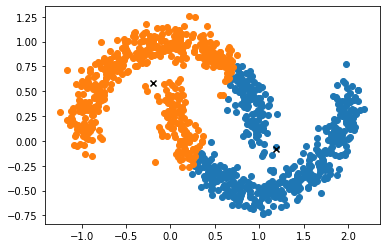

In [119]:
## mostrando os pontos da base
for i in range(n_clusters):
    plt.scatter(df[df.CLUSTER_2 == i]['F1'], df[df.CLUSTER_2 == i]['F2'])

## mostrando os centróides
plt.scatter(
    kmeans.cluster_centers_[:, 0], 
    kmeans.cluster_centers_[:, 1],
    marker = "x",
    color = "black"
)


plt.show

In [125]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.1)

df['DBSCAN'] = dbscan.fit_predict(df[var_expl])

In [126]:
df.head()

,F1,F2,Y,CLUSTER_2,DBSCAN
0,0.666374,0.823195,0,1,0
1,0.281627,0.947888,0,1,0
2,0.938688,0.133326,0,0,0
3,0.255610,-0.078239,1,1,1
4,0.754683,0.756513,0,0,0


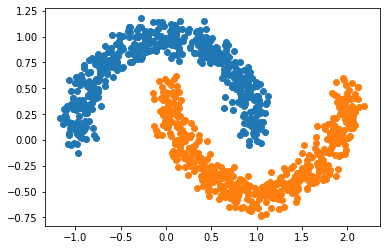

In [128]:
## mostrando os pontos da base
for i in range(n_clusters):
    plt.scatter(df[df.DBSCAN == i]['F1'], df[df.DBSCAN == i]['F2'])

plt.show()

### DBSCAN

1. Dado um ponto p, encontra todos os pontos q que estão a uma distância igual ou inferior a $\varepsilon$ de p;
2. Repete o processo para todos os pontos encontrados, e para todos os pontos novos, recursivamente, determinando assim um grupo;
3. Procura um ponto ainda não visitado para iniciar um novo grupo e repetir os passos 1 e 2.
4. Determina como ruído os pontos que não fazem parte de nenhum grupo.

<img src="imagens/cluster_dbscan.png"/>